In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# from scipy.stats import pearsonr, shapiro
from itertools import combinations

import statsmodels.api as sm

## Extraction

In [3]:
path_datasets = 'Datasets/'

In [4]:
df1 = pd.read_csv(path_datasets + 'ti-corruption-perception-index.csv')
df2 = pd.read_csv(path_datasets + 'human-development-index.csv')
df3 = pd.read_csv(path_datasets + 'political-corruption-index.csv')
df4 = pd.read_csv(path_datasets + 'gdp-per-capita-worldbank.csv')
df5 = pd.read_csv(path_datasets + 'democracy-index-eiu.csv')
df6 = pd.read_csv(path_datasets + 'electoral-democracy-index.csv')
df7 = pd.read_csv(path_datasets + 'freedom-of-expression-index.csv')
df1

,Entity,Code,Year,Corruption Perceptions Index
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15
...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24
2308,Zimbabwe,ZWE,2021,23
2309,Zimbabwe,ZWE,2022,23
2310,Zimbabwe,ZWE,2023,24


# Hypothèses 1 - PIB élevé présente moins de corruption 

## Merge

In [5]:
df_final = df1.merge(df2, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index
0,Afghanistan,AFG,2012,8,0.484
1,Afghanistan,AFG,2013,8,0.492
2,Afghanistan,AFG,2014,12,0.497
3,Afghanistan,AFG,2015,11,0.496
4,Afghanistan,AFG,2016,15,0.495
...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582
2308,Zimbabwe,ZWE,2021,23,0.581
2309,Zimbabwe,ZWE,2022,23,0.594
2310,Zimbabwe,ZWE,2023,24,0.598


In [6]:
df_final = df_final.merge(df3, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate)
0,Afghanistan,AFG,2012,8,0.484,0.961
1,Afghanistan,AFG,2013,8,0.492,0.941
2,Afghanistan,AFG,2014,12,0.497,0.927
3,Afghanistan,AFG,2015,11,0.496,0.904
4,Afghanistan,AFG,2016,15,0.495,0.905
...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795
2308,Zimbabwe,ZWE,2021,23,0.581,0.826
2309,Zimbabwe,ZWE,2022,23,0.594,0.806
2310,Zimbabwe,ZWE,2023,24,0.598,0.862


In [7]:
df_final = df_final.merge(df4, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate),"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


In [8]:
df_final.describe

<bound method NDFrame.describe of            Entity Code  Year  Corruption Perceptions Index  \
0     Afghanistan  AFG  2012                             8   
1     Afghanistan  AFG  2013                             8   
2     Afghanistan  AFG  2014                            12   
3     Afghanistan  AFG  2015                            11   
4     Afghanistan  AFG  2016                            15   
...           ...  ...   ...                           ...   
2307     Zimbabwe  ZWE  2020                            24   
2308     Zimbabwe  ZWE  2021                            23   
2309     Zimbabwe  ZWE  2022                            23   
2310     Zimbabwe  ZWE  2023                            24   
2311     Zimbabwe  ZWE  2024                            21   

      Human Development Index  Political corruption index (central estimate)  \
0                       0.484                                          0.961   
1                       0.492                                

## Nettoyage et transformation

1. Renommer les colonnes (pour avoir des noms simples)

In [93]:
df_final.rename(columns={
    'Corruption Perceptions Index': 'corruption_index',
    'Human Development Index': 'hdi',
    'Political corruption index (central estimate)': 'political_corruption_index',
    'GDP per capita, PPP (constant 2021 international $)': 'gdp_per_capita'
}, inplace=True)

In [94]:
df_final

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


2. Supprimer les lignes avec des données critiques manquantes

In [95]:
df_clean = df_final.dropna(subset=['corruption_index', 'gdp_per_capita'])

In [96]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218


3. Appliquer une transformation log sur le PIB

* les valeurs PIB varient énormément cela peut fausser les corrélations et aplatir les petits pays dans les graphiques
* Le logarithme ramène tout à une échelle plus "compressée", en respectant l’ordre. 

In [97]:
df_clean['log_gdp_per_capita'] = np.log(df_clean['gdp_per_capita'])

/var/folders/40/z21v_lnd0q15_q7p4pqzv2740000gn/T/ipykernel_32164/1921568117.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita,log_gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190,8.001462
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798,8.021775
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426,8.012331
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921,7.995540
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854,7.992534
...,...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062,8.100103
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698,8.002115
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854,8.066140
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218,8.108660


 ### Visualisation avec régression linéaire

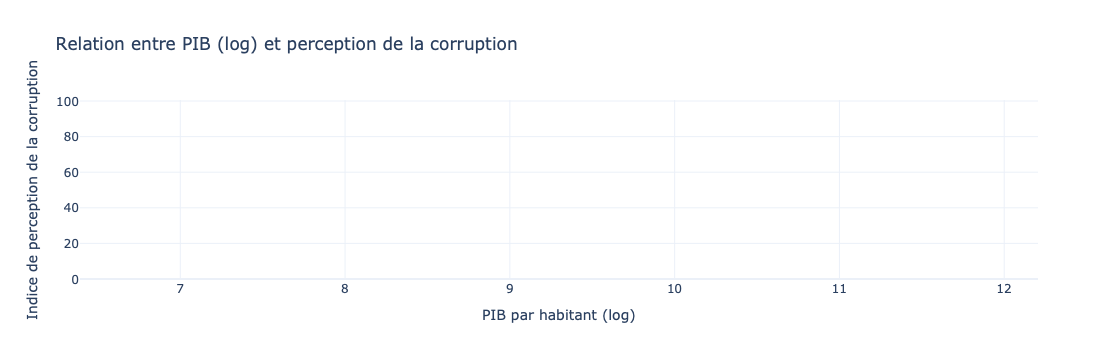

In [99]:
import plotly.express as px

fig = px.scatter(
    df_clean,
    x='log_gdp_per_capita',
    y='corruption_index',
    hover_name='Entity',
    trendline='ols',
    title='Relation entre PIB (log) et perception de la corruption',
    labels={
        'log_gdp_per_capita': 'PIB par habitant (log)',
        'corruption_index': 'Indice de perception de la corruption'
    },
    color_discrete_sequence=['#1f77b4']  # Couleur des points
)

# Modifier la couleur de la droite de régression
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=0.5, color='black')))

# Modifier couleur de la droite séparément
for trace in fig.data:
    if trace.mode == 'lines':
        trace.line.color = '#ff7f0e'  # orange vif

fig.update_layout(template="plotly_white")
fig.show()


* plus le log(PIB/habitant) est élevé, plus l’indice de perception de la corruption est élevé.
* Plus un pays est riche, plus il est perçu comme étant peu corrompu

### Corrélation de Pearson 

La corrélation de Pearson est une mesure qui permet de quantifier la force et la direction de la relation linéaire entre deux variables numériques, c'est un nombre entre -1 et 1 ( 1 corrélation parfaitement positive , -1 corrélation parfaitement négative , pas de corrélation linéaire).

ça mesure si les deux variables évoluent ensemble (dans le même ou dans le sens opposé).

In [100]:
corr, pval = stats.pearsonr(df_clean['log_gdp_per_capita'], df_clean['corruption_index'])
print(f"Corrélation de Pearson : {corr:.3f}")
print(f"P-value associée : {pval:.4f}")

Corrélation de Pearson : 0.729
P-value associée : 0.0000


* 0.729 = corrélation positive forte
* Cela signifie que quand le PIB par habitant augmente, l’indice de perception de la corruption augmente aussi
* Et comme un indice plus élevé = moins de corruption perçue, cela confirme bien :
  #### Les pays plus riches sont perçus comme moins corrompus.

### Régression linéaire

In [101]:
X = sm.add_constant(df_clean['log_gdp_per_capita'])
y = df_clean['corruption_index']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       corruption_index   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2324.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:51:34   Log-Likelihood:                -8142.6
No. Observations:                2045   AIC:                         1.629e+04
Df Residuals:                    2043   BIC:                         1.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -69.8655      2

### K-means

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# On sélectionne les deux variables
X = df_clean[['log_gdp_per_capita', 'corruption_index']]


In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
kmeans = KMeans(n_clusters=3, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


/var/folders/40/z21v_lnd0q15_q7p4pqzv2740000gn/T/ipykernel_32164/756139516.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



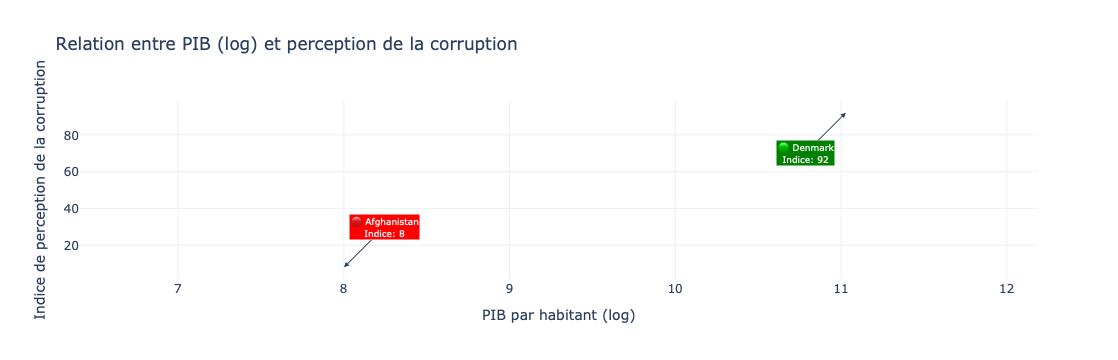

In [105]:
# Pays le plus corrompu
pire_pays = df_clean.loc[df_clean['corruption_index'].idxmin()]
fig.add_annotation(
    x=pire_pays['log_gdp_per_capita'],
    y=pire_pays['corruption_index'],
    text=f"🔴 {pire_pays['Entity']}<br>Indice: {pire_pays['corruption_index']}",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=-40,
    bgcolor="red",
    font=dict(size=9, color="white")
)

# Pays le moins corrompu
meilleur_pays = df_clean.loc[df_clean['corruption_index'].idxmax()]
fig.add_annotation(
    x=meilleur_pays['log_gdp_per_capita'],
    y=meilleur_pays['corruption_index'],
    text=f"🟢 {meilleur_pays['Entity']}<br>Indice: {meilleur_pays['corruption_index']}",
    showarrow=True,
    arrowhead=2,
    ax=-40,
    ay=40,
    bgcolor="green",
    font=dict(size=9, color="white")
)

fig.update_traces(marker=dict(size=6, opacity=0.7, line=dict(width=0.5, color='white')))

fig.update_layout(template="plotly_white")
fig.show()


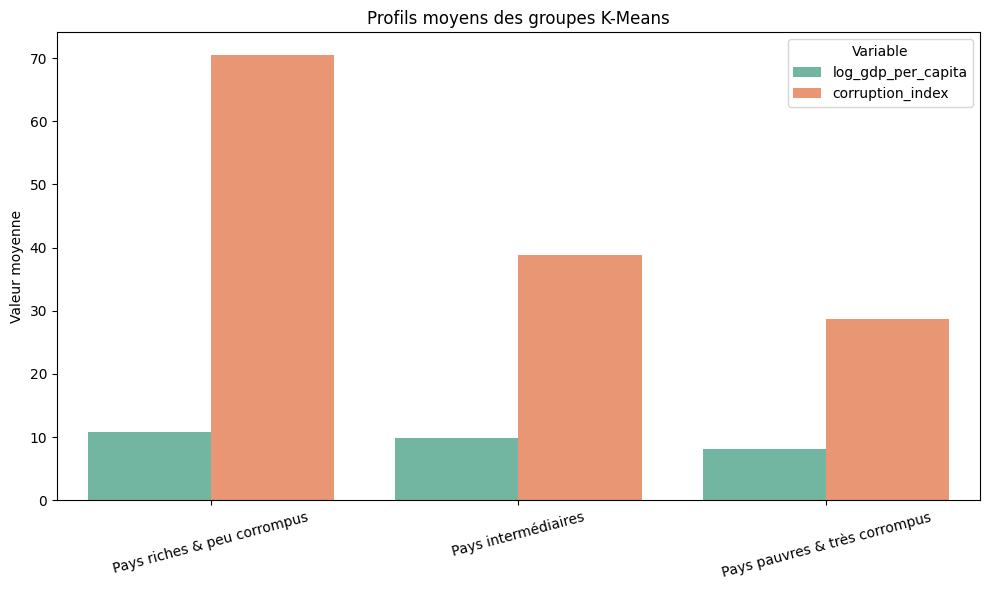

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Calcul des moyennes
group_means = df_clean.groupby('cluster')[['log_gdp_per_capita', 'corruption_index']].mean().reset_index()

# Étape 2 : Tri selon le profil richesse + transparence
group_means['profil_score'] = group_means['log_gdp_per_capita'] + group_means['corruption_index']
group_means = group_means.sort_values('profil_score', ascending=False).reset_index(drop=True)

# Étape 3 : Attribution des noms de profils
profil_labels = ['Pays riches & peu corrompus', 'Pays intermédiaires', 'Pays pauvres & très corrompus']
group_means['profil'] = profil_labels

# Étape 4 : Préparation pour le graphique
group_means_melted = group_means.melt(id_vars='profil', value_vars=['log_gdp_per_capita', 'corruption_index'],
                                      var_name='Variable', value_name='Moyenne')

# Étape 5 : Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=group_means_melted, x='profil', y='Moyenne', hue='Variable', palette='Set2')

plt.title("Profils moyens des groupes K-Means")
plt.xlabel("")
plt.ylabel("Valeur moyenne")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


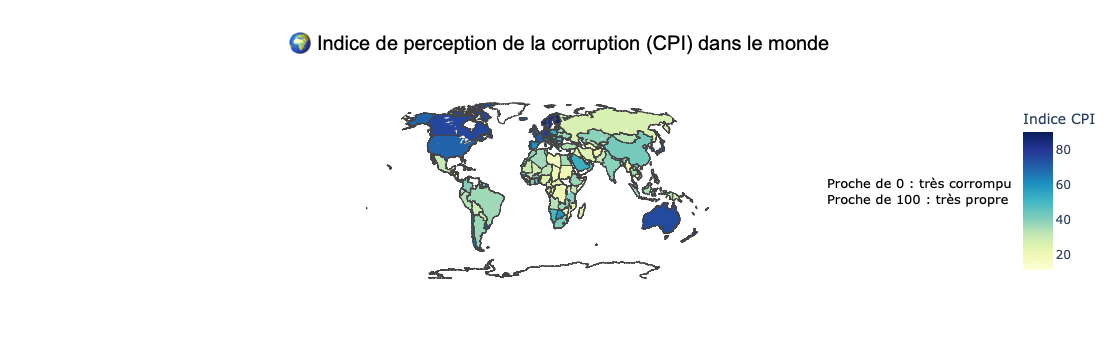

In [107]:
import plotly.express as px

# On prend les dernières données par pays
df_latest = df_clean.sort_values("Year").dropna(subset=['corruption_index'])
df_latest = df_latest.groupby("Entity", as_index=False).last()

# Création de la carte
fig = px.choropleth(
    df_latest,
    locations="Entity",
    locationmode="country names",
    color="corruption_index",
    color_continuous_scale="YlGnBu",
    title="🌍 Indice de perception de la corruption (CPI) dans le monde",
    labels={"corruption_index": "Indice de corruption (CPI)"},
    projection="natural earth"
)

# Mise à jour de la légende
fig.update_layout(
    template="plotly_white",
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5,
    title_font=dict(size=20, family="Arial", color="black"),
    coloraxis_colorbar=dict(
        title="Indice CPI",
        tickvals=[0, 20, 40, 60, 80, 100],
        ticktext=[
            "0 = Très corrompu",
            "20", "40", "60", "80",
            "100 = Très propre"
        ]
    )
)

# Ajout d'un texte explicatif à côté de l’échelle
fig.add_annotation(
    x=1.02, y=0.5,
    xref='paper', yref='paper',
    text="Proche de 0 : très corrompu<br>Proche de 100 : très propre",
    showarrow=False,
    font=dict(size=13, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.9)"
)

fig.show()


## Conclusion des analyses
* Il existe une corrélation positive forte (r ≈ 0.73) entre le PIB par habitant et l’indice de perception de la corruption
* Cela signifie que plus un pays est riche, moins il est perçu comme corrompu.
* Le clustering K-Means a révélé trois groupes cohérents : riches/propres, intermédiaires, pauvres/corrompus.
* Ces résultats valident l’hypothèse de départ et illustrent le lien entre développement économique et bonne gouvernance perçue

# Hypothèses 2 - Les régimes démocratiques sont associés à une perception de la corruption plus faible

## Merge

In [10]:
df_final_h2 = df1.merge(df5, on=['Entity', 'Code', 'Year'], how='left')
df_final_h2

,Entity,Code,Year,Corruption Perceptions Index,Democracy index
0,Afghanistan,AFG,2012,8,2.48
1,Afghanistan,AFG,2013,8,2.48
2,Afghanistan,AFG,2014,12,2.77
3,Afghanistan,AFG,2015,11,2.77
4,Afghanistan,AFG,2016,15,2.55
...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16
2308,Zimbabwe,ZWE,2021,23,2.92
2309,Zimbabwe,ZWE,2022,23,2.92
2310,Zimbabwe,ZWE,2023,24,3.04


In [11]:
df_final_h2 = df_final_h2.merge(df6, on=['Entity', 'Code', 'Year'], how='left')
df_final_h2

,Entity,Code,Year,Corruption Perceptions Index,Democracy index,Electoral democracy index (central estimate)
0,Afghanistan,AFG,2012,8,2.48,0.362
1,Afghanistan,AFG,2013,8,2.48,0.357
2,Afghanistan,AFG,2014,12,2.77,0.355
3,Afghanistan,AFG,2015,11,2.77,0.353
4,Afghanistan,AFG,2016,15,2.55,0.340
...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16,0.294
2308,Zimbabwe,ZWE,2021,23,2.92,0.289
2309,Zimbabwe,ZWE,2022,23,2.92,0.286
2310,Zimbabwe,ZWE,2023,24,3.04,0.291


In [12]:
df_final_h2 = df_final_h2.merge(df7, on=['Entity', 'Code', 'Year'], how='left')
df_final_h2

,Entity,Code,Year,Corruption Perceptions Index,Democracy index,Electoral democracy index (central estimate),Freedom of expression and alternative sources of information index (central estimate)
0,Afghanistan,AFG,2012,8,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,2.55,0.340,0.651
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,3.04,0.291,0.431


## Nettoyage et transformation

In [13]:
df_final_h2.rename(columns={
    'Corruption Perceptions Index': 'corruption_index',
    'Democracy index': 'democracy_index',
    'Electoral democracy index (central estimate)':'electoral_democracy_index',
    'Freedom of expression and alternative sources of information index (central estimate)': 'freedom_of_expression_index'
}, inplace=True)

df_final_h2

,Entity,Code,Year,corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index
0,Afghanistan,AFG,2012,8,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,2.55,0.340,0.651
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,3.04,0.291,0.431


In [14]:
df_clean_h2 = df_final_h2.dropna(subset=['corruption_index', 'democracy_index', 'electoral_democracy_index', 'freedom_of_expression_index'])
df_clean_h2

,Entity,Code,Year,corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index
0,Afghanistan,AFG,2012,8,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,2.55,0.340,0.651
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,3.04,0.291,0.431


### Détermination du régime selon l'index
On crée une colonne pour indiquer si le pays est une démocratie, démocratie imparfaite ou une dictature

In [15]:
bins = [-np.inf, 4, 7, np.inf]
labels = ['authoritarian', 'flawed_democracy', 'democracy']

df_clean_h2['regime'] = pd.cut(df_clean_h2['democracy_index'], bins=bins, labels=labels, right=True)

df_clean_h2

/tmp/ipykernel_8362/4038213281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_h2['regime'] = pd.cut(df_clean_h2['democracy_index'], bins=bins, labels=labels, right=True)


,Entity,Code,Year,corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index,regime
0,Afghanistan,AFG,2012,8,2.48,0.362,0.722,authoritarian
1,Afghanistan,AFG,2013,8,2.48,0.357,0.712,authoritarian
2,Afghanistan,AFG,2014,12,2.77,0.355,0.697,authoritarian
3,Afghanistan,AFG,2015,11,2.77,0.353,0.693,authoritarian
4,Afghanistan,AFG,2016,15,2.55,0.340,0.651,authoritarian
...,...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,3.16,0.294,0.459,authoritarian
2308,Zimbabwe,ZWE,2021,23,2.92,0.289,0.468,authoritarian
2309,Zimbabwe,ZWE,2022,23,2.92,0.286,0.433,authoritarian
2310,Zimbabwe,ZWE,2023,24,3.04,0.291,0.431,authoritarian


### Vérification des types et valeurs nulles

In [16]:
df_clean_h2.dtypes

Entity                           object
Code                             object
Year                              int64
corruption_index                  int64
democracy_index                 float64
electoral_democracy_index       float64
freedom_of_expression_index     float64
regime                         category
dtype: object

In [17]:
na = df_clean_h2.isna().mean().sort_values(ascending=False)
na

Entity                         0.0
Code                           0.0
Year                           0.0
corruption_index               0.0
democracy_index                0.0
electoral_democracy_index      0.0
freedom_of_expression_index    0.0
regime                         0.0
dtype: float64

## Analyses descriptives

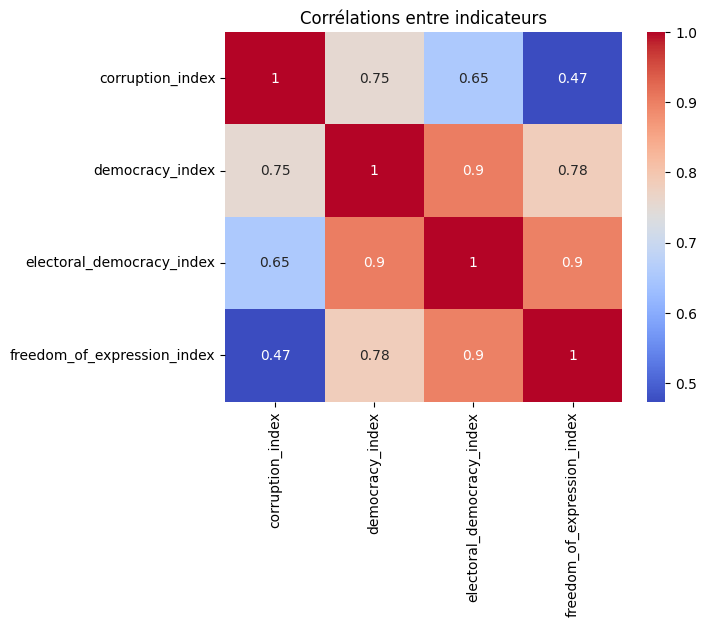

In [18]:
plt.figure()
corr = df_clean_h2[['corruption_index', 'democracy_index',
           'electoral_democracy_index', 'freedom_of_expression_index']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélations entre indicateurs")
plt.show()

On observe une relative corrélation entre l'index de corruption et l'index de démocratie, ce qui va dans le sens de l'hypothèse

#### Moyennes, quantiles et écart-type de l'indice de perception de corruption par régime

In [21]:
df_stats = df_clean_h2.groupby('regime')['corruption_index'].describe()
df_stats

/tmp/ipykernel_8362/3133220401.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stats = df_clean_h2.groupby('regime')['corruption_index'].describe()


,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
authoritarian,698.0,29.729226,12.664404,8.0,20.0,27.0,36.0,71.0
flawed_democracy,834.0,37.501199,11.593686,15.0,30.0,36.0,41.0,87.0
democracy,612.0,64.475490,15.089294,28.0,54.0,63.0,77.0,92.0


- La moyenne des régimes **autoritaires est très basse** (29.7 / 100) et 50% des valeurs se situent **entre 20 et 36** -> indiquant une **forte perception de corruption**
- La moyenne des démocraties imparfaites est **supérieure mais en dessous de 50** (37.5 / 100) et 50% des valeurs sont **entre 30 et 41** -> la perception de corruption est **proche des régimes autoritaires** 
- La moyenne des démocratie est supérieur à 50 avec un score **relativement haut** (64.5 / 100) et 50% des valeurs sont **entre 54 et 77** -> indiquant une **faible perception de corruption**

Selon la règle empirique :
- Pour les régimes autoritaires : 68% ont un score **entre 17.1 et 42.3** et 95% ont un score **entre 4.5 et 54.9**
- Pour les démocraties imparfaites : 68% ont un score **entre 25.9 et 49.1** et 95% ont un score **entre 14.3 et 60.7**
- Pour les démocraties : 68% ont un score **entre 49.4 et 79.6** et 95% ont un score entre **34.3 et 94.7**
Le grand écart-type chez les démocraties montrent **une grande variété**.

En assumant une limite arbitraire à **50** sur l'indice de perception de corruption pour définir un régime corrompu ou non :
Nous pouvons donc en déduire qu'être un **régime autoritaire** voire dans une certaine mesure **une démocratie imparfaite** est une **raison majeur** pour obtenir une **forte perception de corruption**.
En revanche, être une démocratie **rend plus probable une faible perception** de la corruption mais **ne semble pas être un élément majeur** pour avoir une perception de corruption faible.

Cela est renforcé en comparant les extrêmes :
- Autoritaire : de 8 à 71
- Démocratie imparfaite : de 15 à 87
- Démocratie : de 28 à 92

### Visualisation du groupeBy avec un Box plot

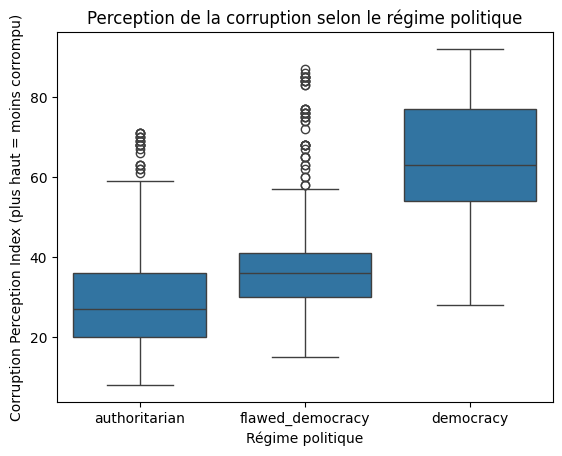

In [59]:
sns.boxplot(x='regime', y='corruption_index', data=df_clean_h3, order=['authoritarian', 'flawed_democracy', 'democracy'])
plt.title("Perception de la corruption selon le régime politique")
plt.ylabel("Corruption Perception Index (plus haut = moins corrompu)")
plt.xlabel("Régime politique")
plt.show()

Il ne semble pas y avoir de valeurs abhérrantes chez les démocraties, mais il y en a énormément chez les démocraties imparfaites.
On peut qualifier ces outliers comme des exceptions à la règle.

In [23]:
df_stats_by_year = df_clean_h2.groupby(['Year', 'regime'])['corruption_index'].describe()
df_stats_by_year

/tmp/ipykernel_8362/520123877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stats_by_year = df_clean_h2.groupby(['Year', 'regime'])['corruption_index'].describe()


count       mean        std   min    25%   50%    75%  \
Year regime                                                                    
2012 authoritarian      51.0  30.156863  12.957427   8.0  21.50  28.0  35.50   
     flawed_democracy   67.0  36.701493  11.643720  18.0  30.50  35.0  41.00   
     democracy          47.0  64.382979  16.598262  33.0  54.00  65.0  77.00   
2013 authoritarian      50.0  29.260000  13.179777   8.0  21.00  26.0  35.50   
     flawed_democracy   68.0  36.338235  11.898338  15.0  28.00  35.5  41.00   
     democracy          47.0  63.957447  16.593552  30.0  53.00  63.0  77.00   
2014 authoritarian      51.0  30.058824  13.173324   8.0  20.50  27.0  36.50   
     flawed_democracy   66.0  37.060606  11.583647  16.0  30.00  35.5  40.75   
     democracy          47.0  64.702128  16.374576  28.0  54.50  63.0  78.50   
2015 authoritarian      50.0  30.380000  13.928227   8.0  21.00  28.0  34.75   
     flawed_democracy   63.0  36.428571  12.145242  16.0  28.00  36.0  39.50   
     democracy          50.0  63.780000  17.474518  28.0  53.25  62.5  78.50   
2016 authoritarian      49.0  29.938776  12.455601  12.0  20.00  29.0  35.00   
     flawed_democracy   67.0  36.791045  12.222108  17.0  29.00  35.0  41.00   
     democracy          47.0  64.382979  16.200581  35.0  54.50  62.0  78.50   
2017 authoritarian      52.0  30.000000  12.483715  14.0  20.75  29.0  35.25   
     flawed_democracy   66.0  37.272727  11.692924  18.0  29.25  36.0  40.75   
     democracy          47.0  64.574468  15.211187  37.0  54.50  63.0  77.00   
2018 authoritarian      53.0  29.528302  12.748460  13.0  20.00  27.0  35.00   
     flawed_democracy   64.0  37.765625  11.839860  18.0  30.00  36.0  41.00   
     democracy          48.0  63.916667  15.342658  35.0  53.50  62.0  76.25   
2019 authoritarian      53.0  29.792453  12.814293  13.0  20.00  26.0  35.00   
     flawed_democracy   64.0  37.765625  11.523258  18.0  30.00  35.5  41.00   
     democracy          48.0  64.166667  14.804159  36.0  53.75  62.0  77.00   
2020 authoritarian      56.0  30.250000  12.768213  14.0  21.00  27.5  36.50   
     flawed_democracy   63.0  38.301587  11.730351  18.0  31.00  37.0  42.50   
     democracy          46.0  64.869565  14.518354  35.0  54.75  63.5  76.75   
2021 authoritarian      58.0  29.965517  12.358626  13.0  20.25  27.5  36.00   
     flawed_democracy   63.0  38.666667  11.259405  23.0  32.50  37.0  42.00   
     democracy          45.0  65.688889  13.567713  41.0  55.00  67.0  74.00   
2022 authoritarian      58.0  29.431034  11.637978  13.0  21.25  26.0  35.25   
     flawed_democracy   61.0  38.065574  11.169704  23.0  33.00  36.0  40.00   
     democracy          47.0  64.787234  13.545312  40.0  54.50  63.0  74.00   
2023 authoritarian      58.0  29.172414  11.816043  13.0  20.00  26.0  36.75   
     flawed_democracy   61.0  38.278689  11.099746  23.0  33.00  36.0  42.00   
     democracy          47.0  64.680851  13.397122  39.0  54.50  64.0  75.50   
2024 authoritarian      59.0  28.745763  13.652830  10.0  19.50  26.0  34.00   
     flawed_democracy   61.0  38.360656  11.518149  22.0  32.00  37.0  43.00   
     democracy          46.0  64.413043  13.315949  38.0  56.00  64.0  76.00   

                        max  
Year regime                  
2012 authoritarian     68.0  
     flawed_democracy  87.0  
     democracy         90.0  
2013 authoritarian     69.0  
     flawed_democracy  86.0  
     democracy         91.0  
2014 authoritarian     70.0  
     flawed_democracy  84.0  
     democracy         92.0  
2015 authoritarian     71.0  
     flawed_democracy  85.0  
     democracy         91.0  
2016 authoritarian     66.0  
     flawed_democracy  84.0  
     democracy         90.0  
2017 authoritarian     71.0  
     flawed_democracy  84.0  
     democracy         89.0  
2018 authoritarian     70.0  
     flawed_democracy  85.0  
     democracy         88.0  
2019 authoritarian     71.0  
     flawed_democracy 

#### T-test ou Mann-Whitney

In [24]:
# T-test ou Mann-Whitney
g1 = df_clean_h2[df_clean_h2['regime'] == 'democracy']['corruption_index']
g2 = df_clean_h2[df_clean_h2['regime'] == 'flawed_democracy']['corruption_index']
g3 = df_clean_h2[df_clean_h2['regime'] == 'authoritarian']['corruption_index']

print("Shapiro democracy:", stats.shapiro(g1))
print("Shapiro flawed_democracy:", stats.shapiro(g2))
print("Shapiro authoritarian:", stats.shapiro(g3))

Shapiro democracy: ShapiroResult(statistic=np.float64(0.9715022995114718), pvalue=np.float64(1.5596327052337078e-09))
Shapiro flawed_democracy: ShapiroResult(statistic=np.float64(0.8601957518767646), pvalue=np.float64(1.4337584992407475e-26))
Shapiro authoritarian: ShapiroResult(statistic=np.float64(0.9216041455798247), pvalue=np.float64(1.412782500395268e-18))


Toutes les distributions s’écartent significativement de la normalité → ANOVA inapplicable.

In [25]:
# Si tous p > 0.05 → normalité ≈ ok
if all([stats.shapiro(g).pvalue > 0.05 for g in [g1, g2, g3]]):
    # ANOVA classique
    anova = stats.f_oneway(g1, g2, g3)
    print("ANOVA:", anova)
else:
    # Kruskal-Wallis (non paramétrique)
    kruskal_res = stats.kruskal(g1, g2, g3)
    print("Kruskal-Wallis:", kruskal_res)

Kruskal-Wallis: KruskalResult(statistic=np.float64(1112.539869558175), pvalue=np.float64(2.600380356973356e-242))


Au moins une distribution diffère significativement des autres.

In [26]:
# Comparaisons par paires
pairs = list(combinations(['democracy', 'flawed_democracy', 'authoritarian'], 2))

for a, b in pairs:
    g1 = df_clean_h2[df_clean_h2['regime'] == a]['corruption_index']
    g2 = df_clean_h2[df_clean_h2['regime'] == b]['corruption_index']
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"{a} vs {b} — p-value: {p}")

democracy vs flawed_democracy — p-value: 7.072601687276453e-165
democracy vs authoritarian — p-value: 2.1198590733116168e-176
flawed_democracy vs authoritarian — p-value: 7.824217711831718e-47


La différence entre :

Une **démocratie** et une **démocratie imparfaite** est **forte**<br>
Une **démocratie** et un **régime autoritaire** est **massive**<br>
Un **régime autoritaire** et une **démocratie imparfaite** est **moyenne**<br>

#### Boxplot corruption par régime

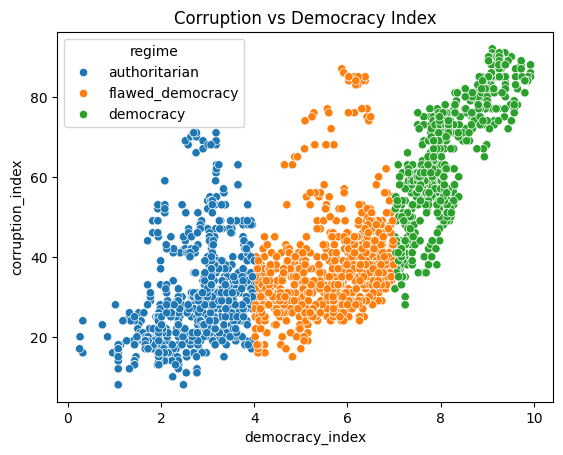

In [27]:
plt.figure()
sns.scatterplot(x='democracy_index', y='corruption_index', hue='regime', data=df_clean_h2)
plt.title("Corruption vs Democracy Index")

plt.show()

On observe que la **grande majorité des régimes autoritaires et démocraties imparfaites** ont un score de perception de corruption **en dessous de 50** avec l'amas principal des régimes autoritaire autour de 25 et celui des démocraties imparfaites autour de 30.

Les démocraties en revanche, **sont beaucoup plus dispersées** allant de scores en dessous de 40 (pays vu comme corrompu) à plus 80 (pays vu comme très peu corrompu).
Les points forment presque une droite.

On peut donc déduire de cette visualisation que si le pays a un **régime autoritaire** ou est une **démocratie imparfaite**, elle a de **très forte chance d'être perçu comme corrompu**.
A l'inverse, **si le pays est une démocratie** elle a certe de **forte chance d'être moins corrompu** que les deux autres régimes, mais a une **chance non négligeable d'être quand même perçu comme relativement corrompu**.
Il faut donc **séparé les démocraties par un autre facteur**. 

/var/folders/40/z21v_lnd0q15_q7p4pqzv2740000gn/T/ipykernel_32164/927356784.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



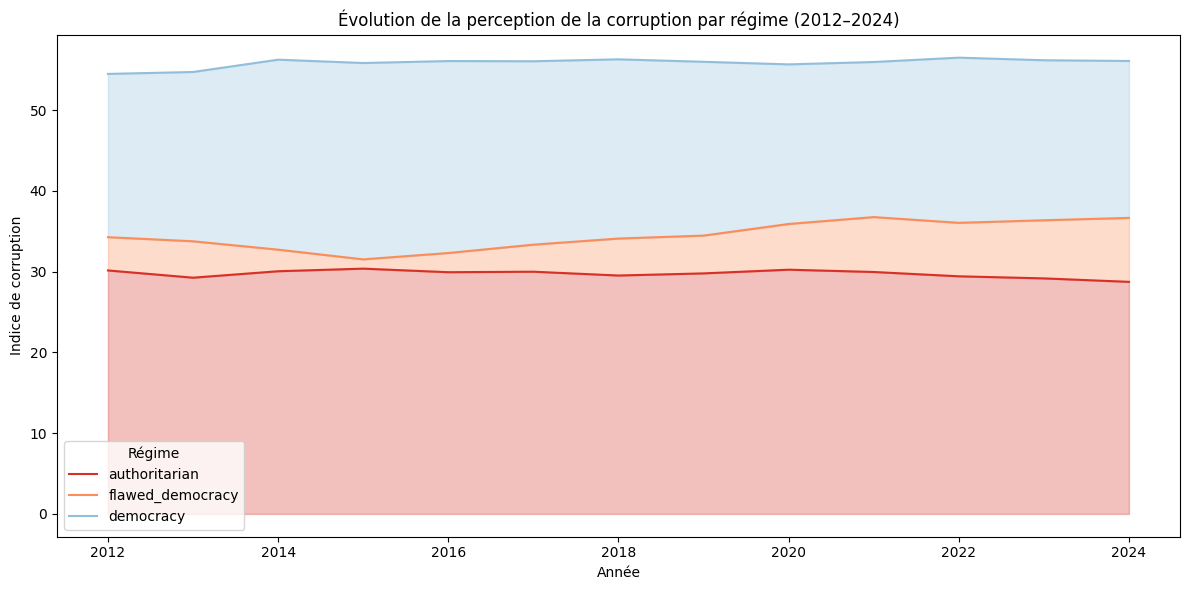

In [126]:
# Moyenne annuelle par régime
df_mean_year = df_clean_h3.groupby(['Year', 'regime'])['corruption_index'].mean().reset_index()

# Pivot : années en index, régimes en colonnes
pivot_df = df_mean_year.pivot(index='Year', columns='regime', values='corruption_index')

# Ordonner les régimes par valeur moyenne (croissant)
mean_levels = pivot_df.mean().sort_values()
regimes_ordered = mean_levels.index.tolist()

# Palette couleur
regimes = ['authoritarian', 'flawed_democracy', 'democracy']

colors = {
    'authoritarian': '#d73027',        # rouge foncé
    'flawed_democracy': '#fc8d59',     # orange clair
    'democracy': '#91bfdb'             # bleu pâle
}

# Tracé
plt.figure(figsize=(12, 6))

# Remplissage de 0 jusqu'à la première courbe (minimale)
first = regimes_ordered[0]
plt.fill_between(pivot_df.index, 0, pivot_df[first], color=colors[first], alpha=0.3)

# Remplissage entre les courbes suivantes
for i in range(len(regimes_ordered) - 1):
    lower = pivot_df[regimes_ordered[i]]
    upper = pivot_df[regimes_ordered[i + 1]]
    plt.fill_between(pivot_df.index, lower, upper, color=colors[regimes_ordered[i + 1]], alpha=0.3)

# Tracé des lignes
for regime in regimes_ordered:
    plt.plot(pivot_df.index, pivot_df[regime], label=regime, color=colors[regime])

# Affichage
plt.title("Évolution de la perception de la corruption par régime (2012–2024)")
plt.xlabel("Année")
plt.ylabel("Indice de corruption")
plt.legend(title="Régime")
plt.tight_layout()
plt.show()

On peut voir sur ce graphique qu'on observe pas de variation majeur de l'indice de perception de corruption selon le temps.<br>
Autrement dit, **le temps ne semble pas avoir d'influence sur la différence de perception de la corruption entre les régimes politiques**, du moins entre 2012 et 2024.  

## Conclusion des analyses

- Les régimes autoritaires sont ceux où la corruption est perçue comme la plus forte. Les pays autoritaires peuvent être en très grande majorité qualifiés de corrompu.
- Les démocraties imparfaites sont intermédiaires, mais plus proches des régimes autoritaires que des démocraties. Les pays avec une démocraties imparfaite peuvent en majorité qualifiés de corrompu, il y a en revanche beaucoup de cas particuliers.
- Les démocraties présentent les scores les plus élevés sur l’index de perception de corruption et donc sont perçus comme moins corrompu. En revanche, la perception de la corruption varient beaucoup.

En conclusion, bien qu'être une démocratie permet d'avoir une perception de la corruption plus faible que les autres régimes, cela ne suffit pas à avoir une perception de la corruption faible.
Et si l'on compte quand même les démocraties imparfaites comme démocraties alors la réponse est clairement non, être une démocratie ne permet pas d'être associé à une faible perception de la corruption. 